In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
color = "#2E3037"
background_color = "Dark" # Dark or White

## Loading data

In [2]:
data = pd.read_csv("../dataset/dataset_4.csv", sep = ";").drop("Unnamed: 0", 1).sample(700000)

### Standarizing values

In [3]:
data_std = data.drop(["Acertou", "Previsao", "DESEMPENHO_BAIXO"], 1)[:]
for col in data_std.columns:
    mean = data_std[col].mean()
    std = data_std[col].std()
    data_std[col] = (data_std[col]-mean)/std

## Reducing dimension with PCA

### Applying PCA

In [4]:
pca = PCA(n_components=2).fit(data_std)
pca_2d = pca.transform(data_std)
print("Explained Variance: " + str(100*round(sum(pca.explained_variance_ratio_), 2)) + "%.")

Explained Variance: 38.0%.


## Clusters

### Using the Elbow Method to find the best number of clusters

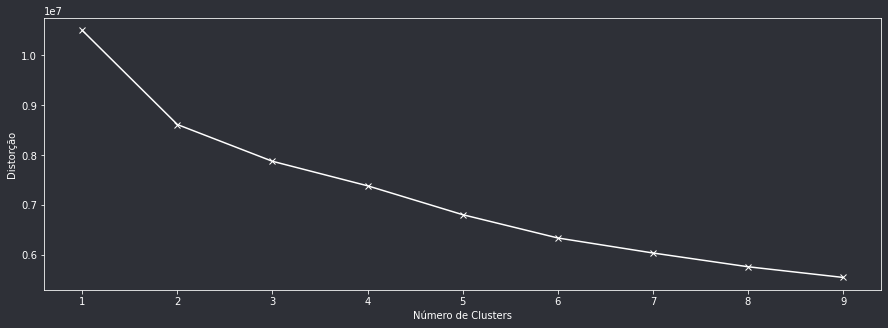

In [5]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_std)
    distortions.append(kmeanModel.inertia_)

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 5))
    plt.plot(K, distortions, 'bx-')

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 5), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    plt.plot(K, distortions, 'wx-')

plt.xlabel('Número de Clusters')
plt.ylabel('Distorção')
plt.show()

### Target Variable

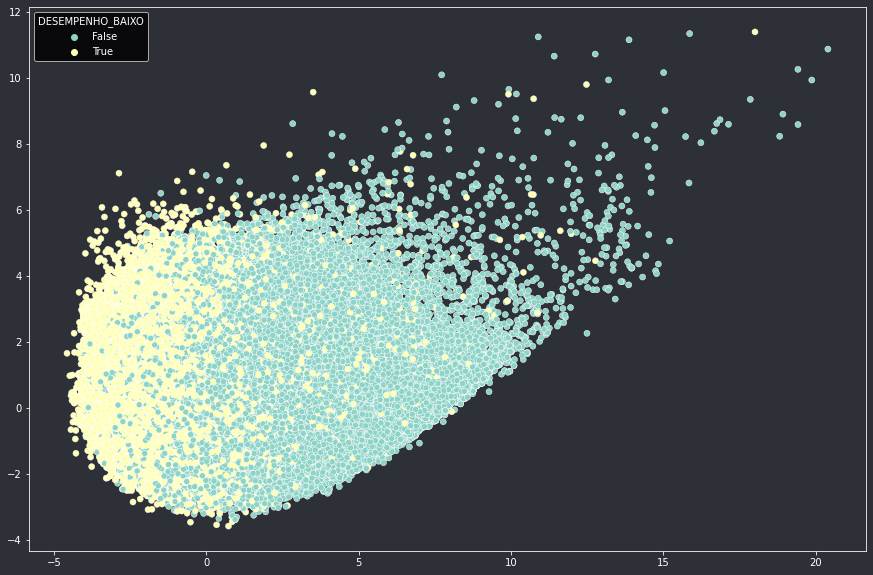

In [6]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["DESEMPENHO_BAIXO"], cmap = "mako")

### Applying result to K-Means

In [7]:
n = 2
kmeans = KMeans(n_clusters = n).fit(data_std)
labels = kmeans.labels_
data["Cluster"] = labels

### Ploting 2 Clusters

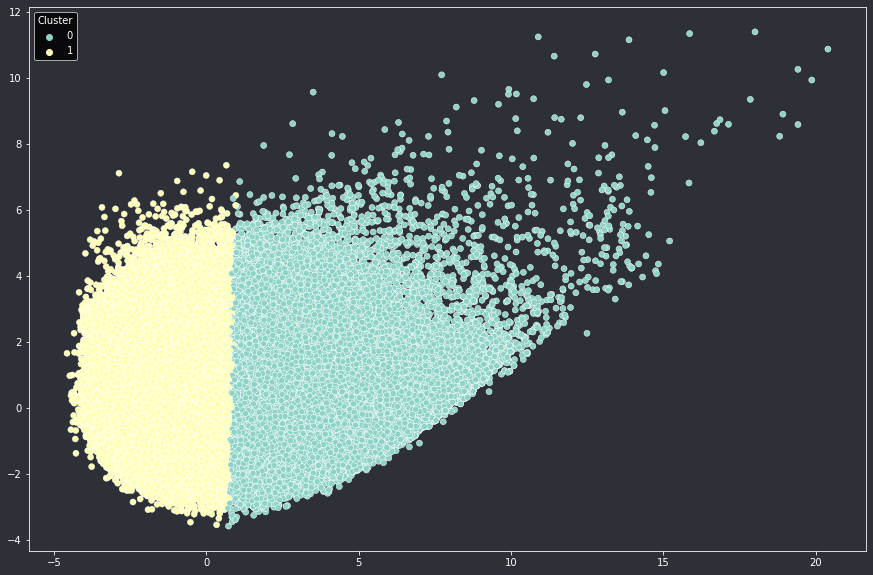

In [8]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x = pca_2d[:, 0], y = pca_2d[:, 1], hue = data["Cluster"], cmap = "mako")

### Cluster Statistics

In [9]:
print("Proporção 0 : " + str(round(100*len(data[data["Cluster"] == 0])/len(data), 2)) + "%")
print("Proporção 1 : " + str(round(100*len(data[data["Cluster"] == 1])/len(data), 2)) + "%")

Proporção 0 : 27.57%
Proporção 1 : 72.43%


### Cluster 0

In [10]:
value = len(data[data["Cluster"] == 0][data["DESEMPENHO_BAIXO"] == 1])/len(data[data["Cluster"] == 0])
print("Proporção de candidatos abaixo da média: " + str(round(100*value, 2)) + "%")

value = len(data[data["Cluster"] == 0][data["DESEMPENHO_BAIXO"] == 0])/len(data[data["Cluster"] == 0])
print("Proporção de candidatos acima da média: " + str(round(100*value, 2)) + "%")

Proporção de candidatos abaixo da média: 19.85%
Proporção de candidatos acima da média: 80.15%


### Cluster 1

In [11]:
value = len(data[data["Cluster"] == 1][data["DESEMPENHO_BAIXO"] == 1])/len(data[data["Cluster"] == 1])
print("Proporção de candidatos abaixo da média: " + str(round(100*value, 2)) + "%")

value = len(data[data["Cluster"] == 1][data["DESEMPENHO_BAIXO"] == 0])/len(data[data["Cluster"] == 1])
print("Proporção de candidatos acima da média: " + str(round(100*value, 2)) + "%")

Proporção de candidatos abaixo da média: 61.56%
Proporção de candidatos acima da média: 38.44%


### Ploting 3 Clusters

In [18]:
n = 3
kmeans = KMeans(n_clusters = n).fit(data_std)
labels = kmeans.labels_
data["Cluster"] = labels

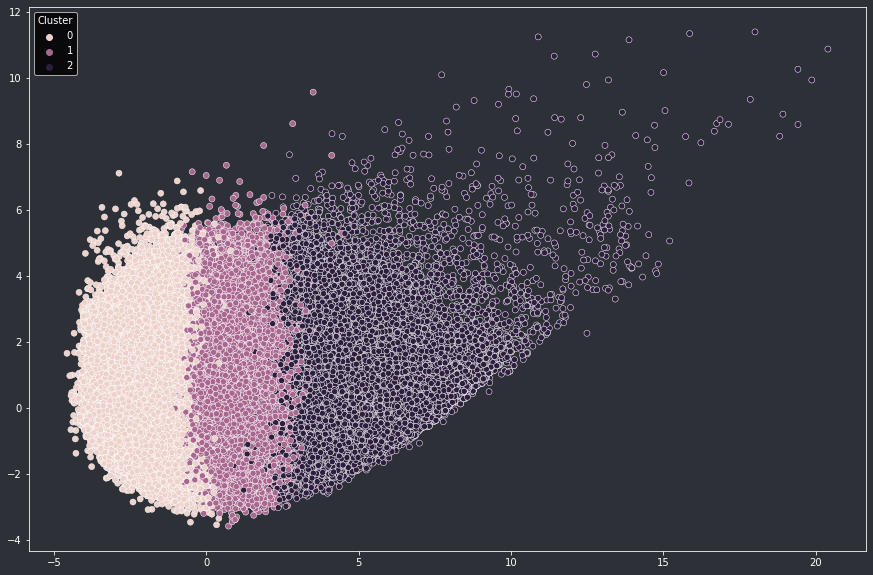

In [19]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x = pca_2d[:, 0], y = pca_2d[:, 1], hue = data["Cluster"], cmap = "mako")

### Cluster Statistics

In [20]:
print("Proporção 0 : " + str(round(100*len(data[data["Cluster"] == 0])/len(data), 2)) + "%")
print("Proporção 1 : " + str(round(100*len(data[data["Cluster"] == 1])/len(data), 2)) + "%")
print("Proporção 2 : " + str(round(100*len(data[data["Cluster"] == 2])/len(data), 2)) + "%")

Proporção 0 : 46.5%
Proporção 1 : 42.29%
Proporção 2 : 11.21%


### Cluster 0

In [21]:
value = len(data[data["Cluster"] == 0][data["DESEMPENHO_BAIXO"] == 1])/len(data[data["Cluster"] == 0])
print("Proporção de candidatos abaixo da média: " + str(round(100*value, 2)) + "%")

value = len(data[data["Cluster"] == 0][data["DESEMPENHO_BAIXO"] == 0])/len(data[data["Cluster"] == 0])
print("Proporção de candidatos acima da média: " + str(round(100*value, 2)) + "%")

Proporção de candidatos abaixo da média: 69.72%
Proporção de candidatos acima da média: 30.28%


### Cluster 1

In [22]:
value = len(data[data["Cluster"] == 1][data["DESEMPENHO_BAIXO"] == 1])/len(data[data["Cluster"] == 1])
print("Proporção de candidatos abaixo da média: " + str(round(100*value, 2)) + "%")

value = len(data[data["Cluster"] == 1][data["DESEMPENHO_BAIXO"] == 0])/len(data[data["Cluster"] == 1])
print("Proporção de candidatos acima da média: " + str(round(100*value, 2)) + "%")

Proporção de candidatos abaixo da média: 39.06%
Proporção de candidatos acima da média: 60.94%


### Cluster 2

In [23]:
value = len(data[data["Cluster"] == 2][data["DESEMPENHO_BAIXO"] == 1])/len(data[data["Cluster"] == 2])
print("Proporção de candidatos abaixo da média: " + str(round(100*value, 2)) + "%")

value = len(data[data["Cluster"] == 2][data["DESEMPENHO_BAIXO"] == 0])/len(data[data["Cluster"] == 2])
print("Proporção de candidatos acima da média: " + str(round(100*value, 2)) + "%")

Proporção de candidatos abaixo da média: 9.99%
Proporção de candidatos acima da média: 90.01%
